# Grocery store sales analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest 

In [2]:
path_to_file = 'data/Grocery Database.xlsx'

In [3]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

In [4]:
# Dataset description
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [5]:
df = pd.read_excel(path_to_file)

# Data Cleaning and Validation

In [6]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 50447 rows and 32 columns.


In [7]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [8]:
# I customized the data display so that you can see all the columns of the data set and more rows
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 200)
df[:10]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
5,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,ThyGrace Romanine lettuce,ThyGrace,100 g,2.81,1,0.01,2.7819,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130
6,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,YUVVO French Bean,YUVVO,260 g,3.28,1,0.01,3.2472,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640
7,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,4,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,ThyGrace Holland potato,ThyGrace,690 g,3.75,1,0.01,3.7125,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,Jakarta,Indonesia,Pet Care,Dog Food & Trat,Lamb pate dog food,Nature's Gift,600 g,5.84,1,0.02,5.7232,21.1974,0.1,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968
9,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,1,20,Female,Jakarta,Indonesia,Pet Care,Pet Food,Nutro Beef with vegetables dog food,Nutro,270 g,7.30,1,0.02,7.1540,21.1974,0.1,23.31714,Cash,BDO Unibank,0.076,0.15,0.774,0.55480,1.0950,5.65020


Let's check the correctness of the calculated data for invoices with more than one item, since the data in the "Net Bill Amount" and "Gross Bill Amount" columns are given for the entire invoice at once, and not for an item in the invoice. Take the first such invoice with the number "GIJ00003".

In [9]:
df[df['Receipt Number'] == 'GIJ00003'].Amount.sum()

30.769199999999998

We can see that the table shows the amount of the invoice for the "Net Bill Amount" indicator is 38.3526, while our recalculation gave the result of 30.7692. Let's recalculate the "Net Bill Amount" and "Gross Bill Amount" separately for each item and add new columns to the dataset.

In [10]:
df['Net Bill Amount Recalculation'] = df.Price * df.QTY *(1-df.DISC)

In [11]:
df['Gross Bill Amount Recalculation'] = df['Net Bill Amount Recalculation'] * (1 + df.GST)

In [12]:
df[:5]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount Recalculation,Gross Bill Amount Recalculation
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128,13.32408
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680,25.26480
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769,14.49459
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,3.4848,3.83328
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,4.3659,4.80249


The incorrect calculation of the "Net Bill Amount" and "Gross Bill Amount" columns is most likely an error in the data upload.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Receipt Number                   50447 non-null  object        
 1   Date                             50447 non-null  datetime64[ns]
 2   Year                             50447 non-null  int64         
 3   Month                            50447 non-null  int64         
 4   Time                             50447 non-null  object        
 5   Mobile Number                    50447 non-null  int64         
 6   Membership ID                    50447 non-null  object        
 7   Loyalty Card Points              50447 non-null  int64         
 8   Age                              50447 non-null  int64         
 9   Gender                           50447 non-null  object        
 10  City                             50447 non-null  object   

Having reviewed the formats of our data by column, we can make some adjustments for further work with the data. For example: 
 
1. Format the "Mobile number" column from int to string format, because it is often used as a customer identifier and we will not compare which mobile number is larger and which is smaller, or use it as a statistical indicator
2. Let's transform the 'Time' column, because the existing data type makes it difficult to perceive the information, so we'll change it to the standard HH:MM format.
3. Our dataframe does not contain any empty values and is ready for analysis.

In [14]:
df['Mobile Number'] = df['Mobile Number'].astype(object)

In [15]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f', errors='coerce')
df['Time'] = df['Time'].dt.strftime('%H:%M')

In [16]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount Recalculation,Gross Bill Amount Recalculation
0,GIJ00001,2016-01-02,2016,1,10:08,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128,13.32408
1,GIJ00002,2016-01-02,2016,1,15:46,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680,25.26480
2,GIJ00003,2016-01-02,2016,1,11:28,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769,14.49459
3,GIJ00003,2016-01-02,2016,1,11:28,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,3.4848,3.83328
4,GIJ00003,2016-01-02,2016,1,11:28,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,4.3659,4.80249


In [17]:
# Change the display of the number of decimal places to 3 and look at the statistical indicators of the data
with pd.option_context('display.precision', 3):
    display(df.describe())

,Year,Month,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount Recalculation,Gross Bill Amount Recalculation
count,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,5.045e+04,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000
mean,2017.668,6.477,18.364,35.802,7.424,1.548,0.030,11.168,66.695,0.086,72.379,0.106,1.500e-01,0.744,1.202,1.727,8.584,11.168,12.120
std,1.112,3.454,16.161,14.020,4.754,0.648,0.014,9.227,45.270,0.024,49.094,0.029,1.321e-13,0.029,1.064,1.427,7.135,9.227,10.004
min,2016.000,1.000,0.000,15.000,0.840,1.000,0.010,0.798,0.978,0.060,1.037,0.051,1.500e-01,0.700,0.068,0.126,0.610,0.798,0.846
25%,2017.000,3.000,6.000,23.000,4.280,1.000,0.020,5.214,35.328,0.070,38.616,0.083,1.500e-01,0.722,0.546,0.805,4.083,5.214,5.670
50%,2018.000,7.000,14.000,35.000,5.980,2.000,0.030,8.633,58.586,0.070,63.909,0.109,1.500e-01,0.741,0.928,1.329,6.649,8.633,9.380
75%,2019.000,10.000,26.000,47.000,9.470,2.000,0.040,14.016,90.585,0.100,98.076,0.128,1.500e-01,0.767,1.505,2.178,10.829,14.016,15.194
max,2019.000,12.000,116.000,75.000,40.330,9.000,0.050,299.827,527.668,0.120,559.328,0.150,1.500e-01,0.799,26.235,46.848,239.237,299.827,317.817


Comparing the maximum value and the 75th percentile for Profit Margin, we can see that 25% of the data is between 1.505 and 26,236. The data has a fairly large spread after the value of 1.505. 

Let's consider the questions to the dataset to get insights and use them in the further life of the product.

# Business questions

Features for further data visualisation:

In [18]:
def print_pie(data,title):
    colors = sns.color_palette()
    labels = dict(data).keys()
    plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%', shadow = True) 
    plt.title(title)
    
    
def print_hist(data,title, xlab, ylab):
    color = '#FFFF99'
    plt.hist(data, color = color) 
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title);
    
    

1. What is the minimum, maximum, and average purchase amount? Which purchases generate income?

count    13048.000000
mean        43.178278
std         39.459784
min          0.978500
25%         14.756850
50%         33.117000
75%         59.665200
max        527.668000
Name: Amount, dtype: float64

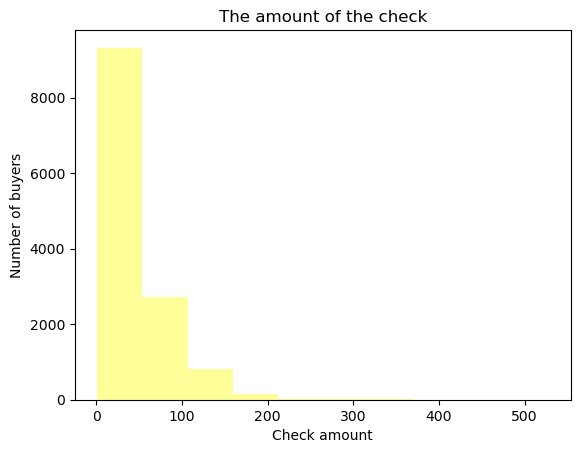

In [19]:
check_amount = df.groupby('Receipt Number').Amount.sum()
print_hist(check_amount, 'The amount of the check', 'Check amount', 'Number of buyers')
df.groupby('Receipt Number').Amount.sum().describe()

Conclusion: there are 13048 unique checks during the research period. The minimum check amount is 0.98, the maximum is 527.68, and the average is 43.18. We also take into account that 3/4 of checks are less than 60. This suggests that our data belongs to a chain of small stores where customers do not make large purchases, such as in hypermarkets, or this is a chain that has a segment of customers who do not make expensive purchases. 
The trend seen in the graph is confirmed by the findings: the higher the amount of the check, the lower the number of customers.

The histogram shows that most of the revenue is generated by the lowest-priced goods. High-value goods have a much smaller impact on revenue.

2. Which product category brought in the most profit during the research period?

In [20]:
pivot_category = df.pivot_table(index=['Category'], columns = ['Country'], values = ['Profit Margin'], aggfunc = 'sum')
pivot_category.style.background_gradient(axis = 0).format('{:.2f}')

Conclusion: 3 categories of goods generated the highest profits during the time of research: Frozen, Beauty, Bakery & Breakfast in all countries of the chain. Expanding the range of products in these categories can increase the level of profit from them.

3. In which country and city does the company make the most profit?

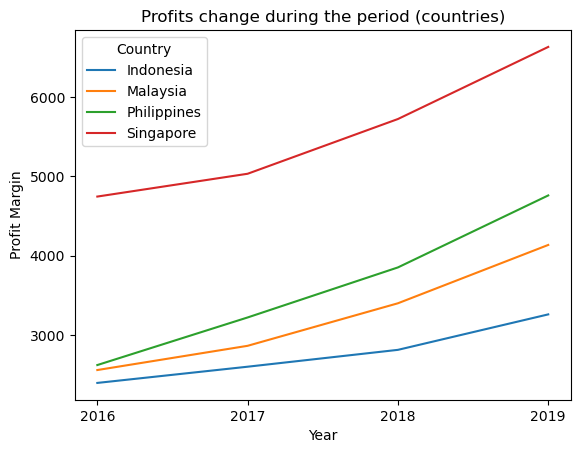

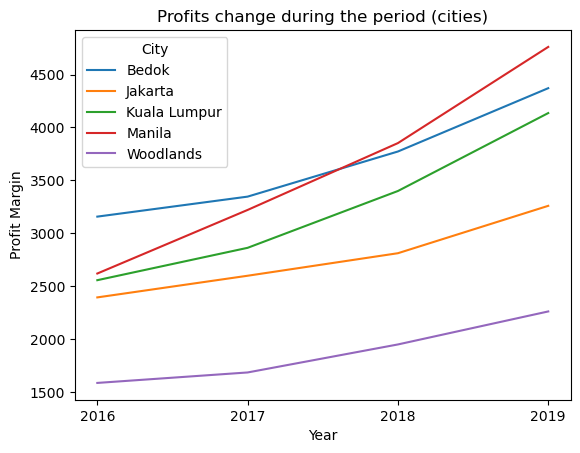

In [21]:
country_pivot = df.pivot_table(index='Year', columns = 'Country', values = 'Profit Margin', aggfunc = 'sum')
city_pivot = df.pivot_table(index='Year', columns = 'City', values = 'Profit Margin', aggfunc = 'sum')
 
country_pivot.plot()
plt.xticks(list(df.Year.unique()))
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.title('Profits change during the period (countries)');

city_pivot.plot()
plt.xticks(list(df.Year.unique()))
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.title('Profits change during the period (cities)');

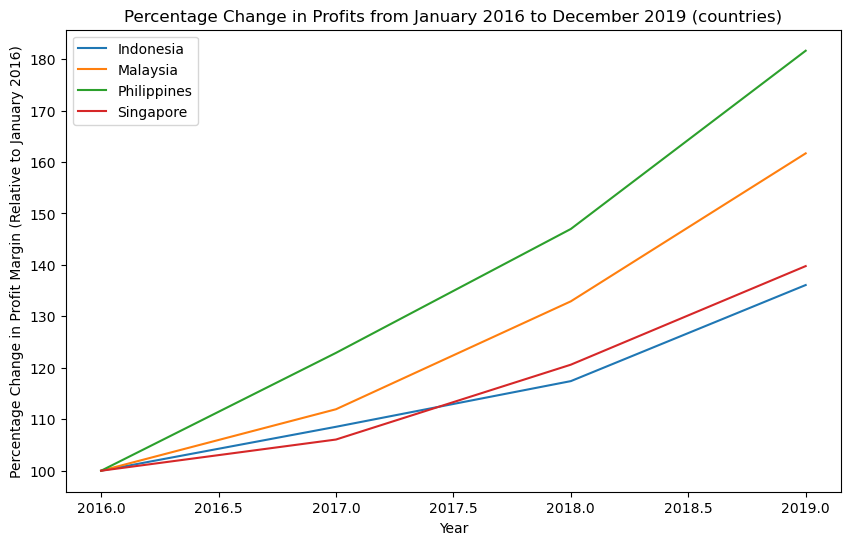

In [22]:
# Filter DataFrame for the period January 2016 to December 2019
filtered_df = df[(df['Year'] >= 2016) & (df['Year'] <= 2019)]

# Country pivot table for the filtered period
country_pivot = filtered_df.pivot_table(index='Year', columns='Country', values='Profit Margin', aggfunc='sum')

# Calculate percentage change for each country relative to January 2016
country_pivot_pct_change = country_pivot / country_pivot.iloc[0] * 100

# Plotting percentage change for countries
plt.figure(figsize=(10, 6))
for country in country_pivot.columns:
    plt.plot(country_pivot.index, country_pivot_pct_change[country], label=country)

plt.xlabel('Year')
plt.ylabel('Percentage Change in Profit Margin (Relative to January 2016)')
plt.title('Percentage Change in Profits from January 2016 to December 2019 (countries)')
plt.legend()

# Show the plot
plt.show()


Conclusion: the charts show that all countries have an upward trend in profitability. Singapore is the leading country in terms of the network. If we look at cities, Manila, located in the Philippines, has a fairly rapid increase in profit from average to the highest, while cities in other countries remain at an average level of profitability. Woodlands has the lowest profitability, and we can see that it is not a new store and that in case of a reduction in activity, this particular store will be closed. But given its share of sales, we need to compare the return on sales of each store.

4. What is the percentage of categories of goods in cities?

In [23]:
grouped = df.groupby(['Category', 'City'])
category_counts = grouped.size().reset_index(name='Count')

In [24]:
total_counts = category_counts.groupby('City')['Count'].sum().reset_index()

In [25]:
merged_df = category_counts.merge(total_counts, on='City', suffixes=('', '_total'))
merged_df['Percentage'] = (merged_df['Count'] / merged_df['Count_total']) * 100

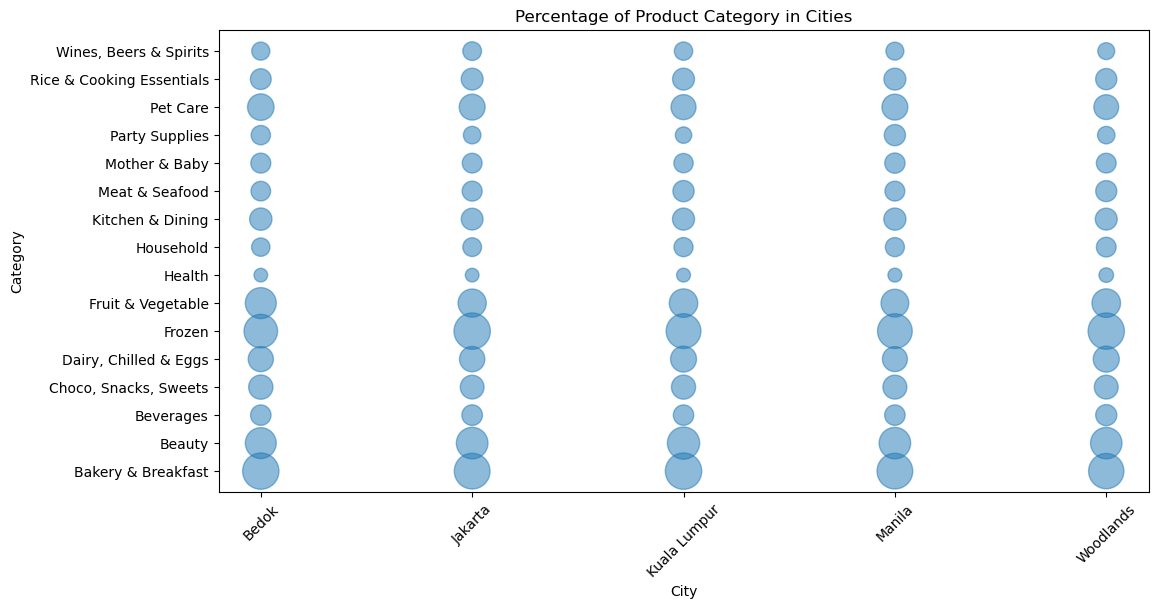

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['City'], merged_df['Category'], s=merged_df['Percentage']*50, alpha=0.5)
plt.xlabel('City')
plt.ylabel('Category')
plt.title('Percentage of Product Category in Cities')
plt.xticks(rotation=45)
plt.show()

Conclusion: 3 product categories: Frozen, Beauty, Bakery & Breakfast have the largest percentage share in urban areas. There is also competition in other categories. The Fruit & Vegetable category has a fairly high performance. Perhaps it does not rank first in terms of profits due to its seasonality. This topic is also open for further research in the dataset.

5. What is the distribution of sales by country and city? Where are purchases made most often?

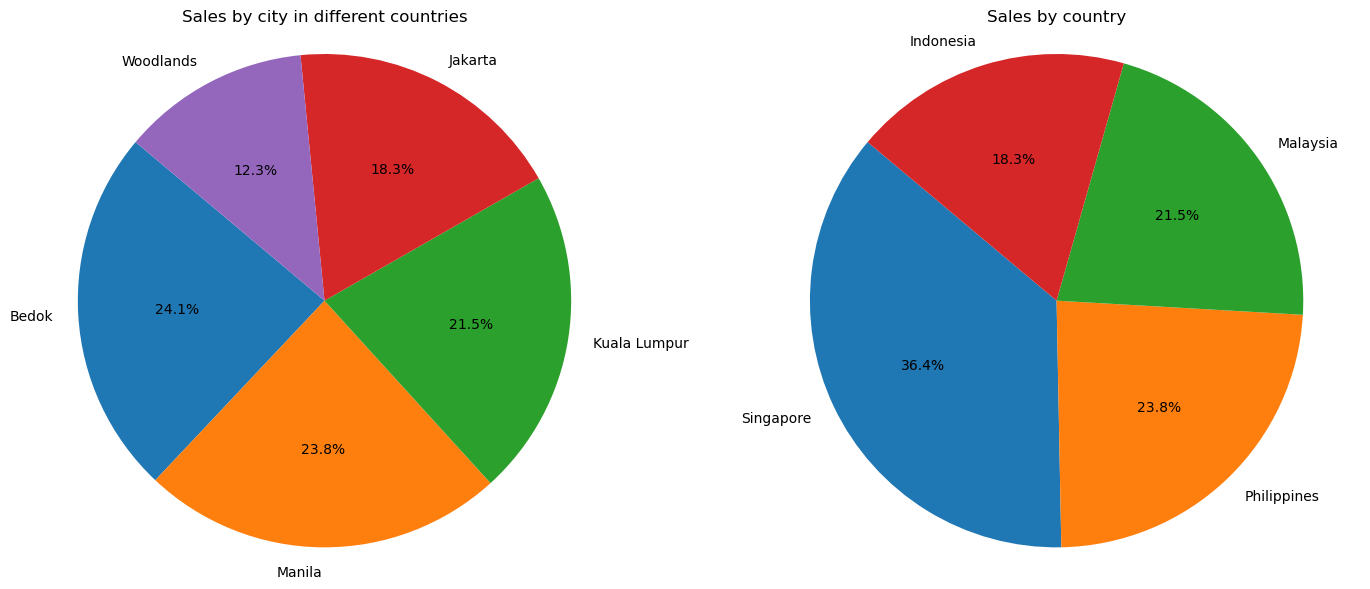

In [27]:
# Group by City, sum the Amount, and sort the data
grouped_data_city = df.groupby('City')['Amount'].sum().reset_index()
sorted_data_city = grouped_data_city.sort_values(by='Amount', ascending=False)

# Group by Country, sum the Amount, and sort the data
grouped_data_country = df.groupby('Country')['Amount'].sum().reset_index()
sorted_data_country = grouped_data_country.sort_values(by='Amount', ascending=False)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting pie chart for cities
axes[0].pie(sorted_data_city['Amount'], labels=sorted_data_city['City'], autopct='%1.1f%%', startangle=140)
axes[0].axis('equal') 
axes[0].set_title('Sales by city in different countries')

# Plotting pie chart for countries
axes[1].pie(sorted_data_country['Amount'], labels=sorted_data_country['Country'], autopct='%1.1f%%', startangle=140)
axes[1].axis('equal') 
axes[1].set_title('Sales by country')
plt.tight_layout()
plt.show()


Conclusion: Singapore (city Bedok in particular) is a leader in sales in the grocery chain. 

6. What about the store's customers: their gender, age, ability to pay and payment method?

In [28]:
df_customer = df.groupby('Membership ID')

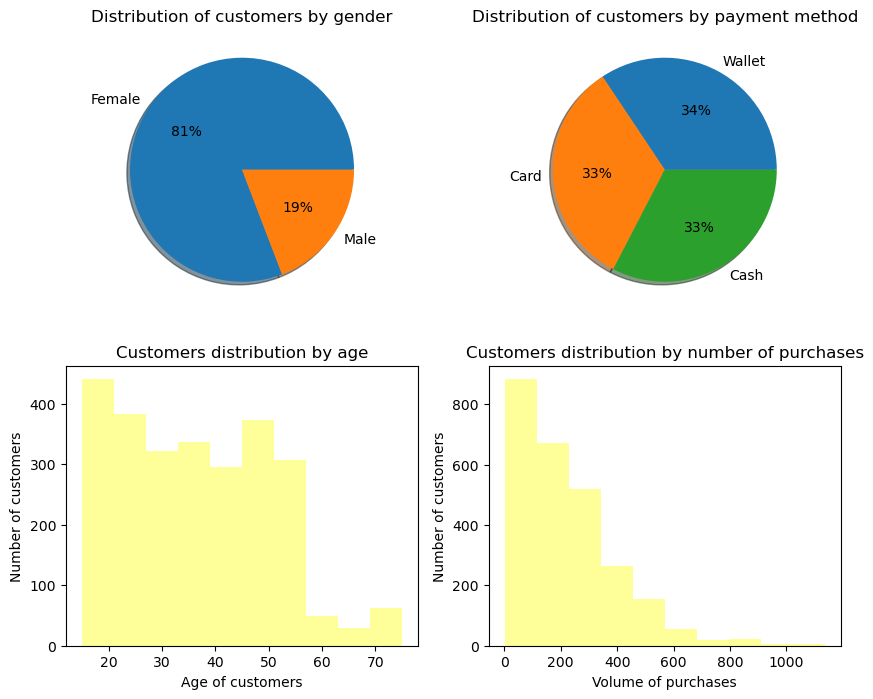

In [29]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)    
print_pie(df_customer.first().Gender.value_counts(), 'Distribution of customers by gender');
plt.subplot(2,2,2) 
print_pie(df_customer.first()['Payment Mode'].value_counts(), 'Distribution of customers by payment method');
plt.subplot(2,2,3)
print_hist(df_customer.first().Age, 'Customers distribution by age', 'Age of customers', 'Number of customers');
plt.subplot(2,2,4)
print_hist(df.groupby('Membership ID')['Amount'].sum(), 'Customers distribution by number of purchases', 'Volume of purchases', 'Number of customers')

Conclusion: women predominate among buyers with a share of 81%. The predominant payment method is non-cash payments (67%) (bank card + e-wallet). The majority of customers are aged 15 to 20. In terms of the amount of purchases, we conclude that the most common purchase amount was $100. Possible business ideas:

   - Increase the range of men's products to attract new customers;
   - since the majority of customers are young people, it is worth monitoring and providing new products for this age group;
   - if self-service cash registers are not yet available, it would be a good solution for cashless payments;
   - development of a mobile application for the chain's stores would also serve as a novelty and attract new customers.

7. How does the sales volume change depending on the quarter? Is there any seasonality trend?

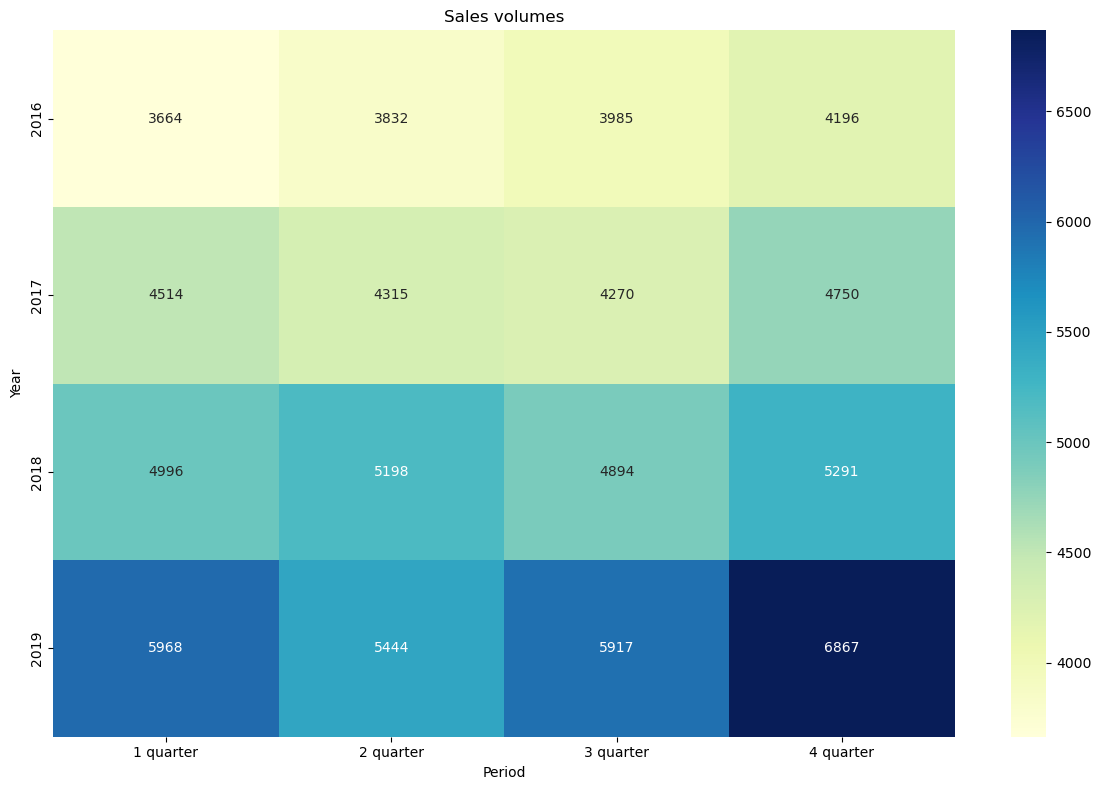

In [30]:
sales_per_month = df.groupby(['Year', 'Month'])['QTY'].sum()
df['Period'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['1 quarter', '2 quarter', '3 quarter', '4 quarter'])
sales_per_period = df.groupby(['Year', 'Period'])['QTY'].sum()
sales_per_period_by_year = sales_per_period.unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(sales_per_period_by_year, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Period')
plt.ylabel('Year')
plt.title('Sales volumes')
plt.tight_layout()
plt.show()

Conclusion: As you can see from the map, the fourth quarter has been the most profitable for four years in a row. The map also shows a steady upward trend in profitability over the years, with Q2 and Q3 of 2018 and 2019 being more profitable than the same quarters in 2016-2017. 

8. Who brings more profit to a business: women or men?

In [31]:
df.groupby('Payment Mode')['Receipt Number'].nunique()

Payment Mode
Card      4407
Cash      4248
Wallet    4393
Name: Receipt Number, dtype: int64

In [32]:
gender_pay = df.pivot_table(index='Payment Mode', columns='Gender', values='Receipt Number', aggfunc='nunique')
gender_pay.style.background_gradient(axis=0)

Gender,Female,Male
Payment Mode,,
Card,3574,833
Cash,3482,766
Wallet,3732,661


In [33]:
country_pay = df.pivot_table(index='Payment Mode', columns='Country', values='Receipt Number', aggfunc='nunique')
country_pay.style.background_gradient(axis=0)

Country,Indonesia,Malaysia,Philippines,Singapore
Payment Mode,,,,
Card,749,1002,1052,1604
Cash,875,821,1045,1507
Wallet,795,1013,997,1588


In [34]:
df_women = df[df["Gender"] == "Female"]
df_men = df[df["Gender"] == "Male"]
total_profit_by_gender = df.groupby('Gender')['Profit Margin'].sum()
total_profit_women = total_profit_by_gender['Female']
total_profit_men = total_profit_by_gender['Male']

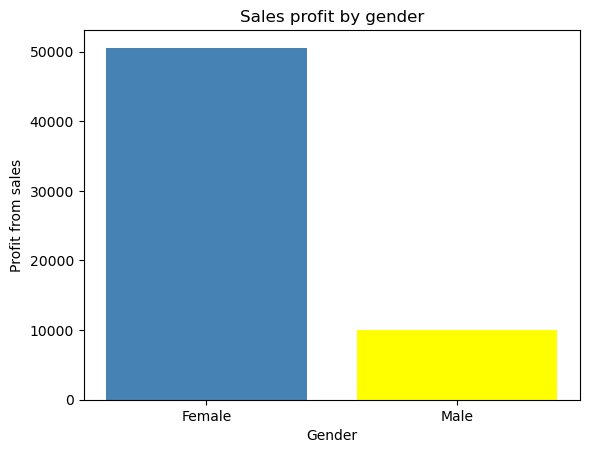

In [35]:
plt.bar(["Female", "Male"], [total_profit_women, total_profit_men], color=['steelblue', 'yellow'])
plt.title("Sales profit by gender")
plt.xlabel("Gender")
plt.ylabel("Profit from sales")
plt.show()

Conclusion: women bring more profit to businesses than the opposite gender. They are also leaders in the number of items in one receipt. It is interesting that women use an electronic wallet more often, while men prefer a card. Due to the fact that there are many more women buyers, it is worth paying attention to the development of special offers for the owners of such wallets.The least advanced in terms of modern payment methods is Indonesia, because cash is most often used here, and this fact should be taken into account when opening new stores in this country. Malaysians mostly use an electronic wallet. Filipinos and Singaporeans prefer cards.

9. What is the ratio of subcategories in the 5 most profitable product lines?

In [36]:
top5_product_lines = df.groupby('Category')['Profit Margin'].sum().nlargest(5).index
top5_data = df[df['Category'].isin(top5_product_lines)]
category_distribution = top5_data.groupby(['Category', 'Sub_Category']).size().unstack()
num_subcategories = len(category_distribution.columns)
num_colors = len(plt.cm.tab20.colors)
colors = plt.cm.tab20.colors[:num_subcategories]

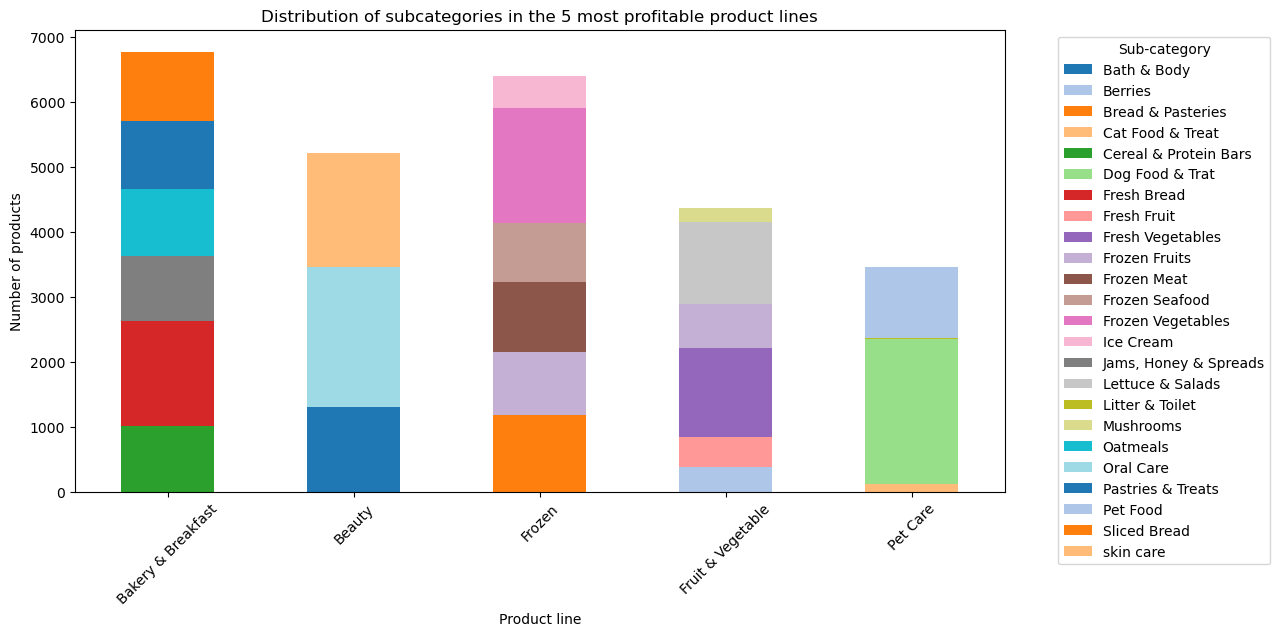

In [37]:
category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.xlabel('Product line')
plt.ylabel('Number of products')
plt.title('Distribution of subcategories in the 5 most profitable product lines')
plt.xticks(rotation=45)
plt.legend(title='Sub-category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Conclusion: the chart shows that the leaders in the number of products in subcategories are:
- Bakery & Breakfast - Fresh bread;
- Beauty - Oral Care;
- Frozen - Frozen Vegetables;
- Fruit and Vegetables - Oatmeals;
- Pet care - Dog food and Trat.

This data can be used for a business idea for related product groups. To place them closer to each other in stores or to create favourable offers for buying 2 units of products.This solution can increase the profit of stores.

10. The Bakery & Breakfast category has the highest profit. But is there a difference between the Beauty and Bakery & Breakfast categories? Let's investigate whether there is a statistically significant difference between the profits generated by these categories. We will use the z-test statistical test. The level of statistical significance is alpha = 0.05.

In [38]:
pivot_bakery = df[df.Category == 'Bakery & Breakfast'].pivot_table(index = 'Receipt Number', values = 'Profit Margin', aggfunc = 'sum' )
bakery = pivot_bakery.to_numpy()

In [39]:
pivot_beauty = df[df.Category == 'Beauty'].pivot_table(index = 'Receipt Number', values = 'Profit Margin', aggfunc = 'sum' )
beauty = pivot_beauty.to_numpy()

In [40]:
alpha = 0.05

    The null hypothesis (H0) is that profits in the bakery and breakfast category and the beauty category do not differ.
    Alternative hypothesis (H1) - the profit of the bakery and breakfast products category and the beauty category differs significantly.

In [41]:
ztest_results = ztest(bakery, beauty, value = 0)

In [42]:
ztest_results

(array([-28.45770599]), array([3.91255306e-178]))

In [43]:
if (ztest_results[1] < alpha):
    print('We reject the hypothesis H0. Profit is significantly different')
else:
    print('We can reject the hypothesis H0. Profits do not differ.')

We reject the hypothesis H0. Profit is significantly different


In [44]:
print(f'The profit of the bakery and breakfast category is {{:.2f}}.\nThe profit of the beauty category is {{:.2f}}.'.format(bakery.sum(), beauty.sum()))

The profit of the bakery and breakfast category is 6224.72.
The profit of the beauty category is 7989.95.


Conclusion: Thus, the p-value is less than the statistical significance level of alpfa. This in turn means that the null hypothesis should be rejected, which means that the profit differs significantly.

11. Let's consider whether there are cases where some goods have low cost but generate high income, or vice versa - there are goods with high cost but sold at a loss? Let's build a regression model and see how the data fits on the regression line, and if there are any outliers.

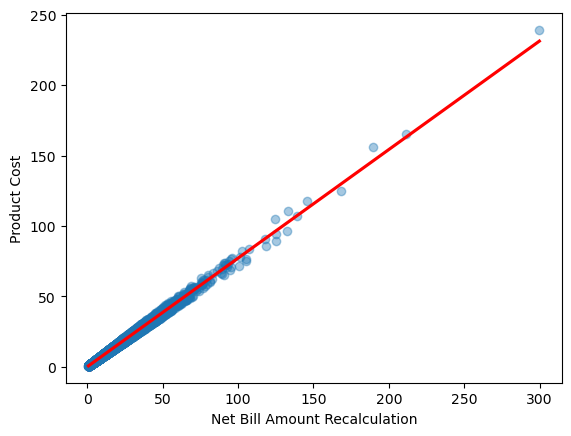

In [45]:
sns.regplot(data = df, x = 'Net Bill Amount Recalculation', y = 'Product Cost', scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'red'});

Conclusion: The data is tightly packed along the regression line. There is a direct correlation between the cost of goods and the income received from them. There are no outliers.

12. What types of payments are used by buyers and which banks service transactions?

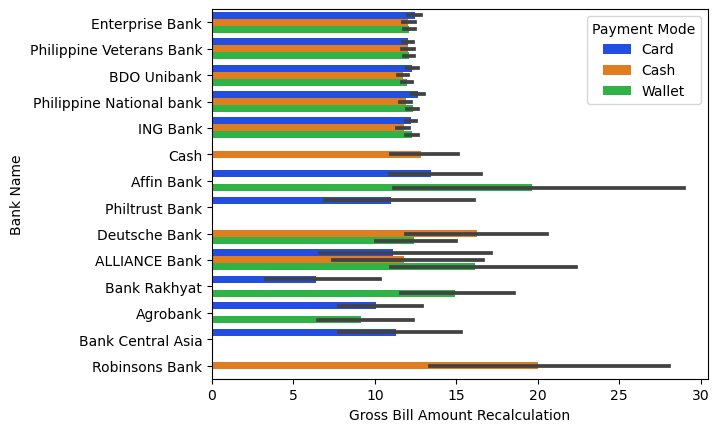

In [46]:
sns.barplot(x = 'Gross Bill Amount Recalculation', y = 'Bank Name', data = df, palette = 'bright', hue = 'Payment Mode');

Conclusion: Customers use different payment systems. With some banks, it is possible to expand the wallet payment method (Philtrust Bank, Bank Central Asia). In general, it is possible to encourage customers to pay online and by card, and it may be worth creating discount programmes for card or wallet payments.